In [3]:
# module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
# load
df = pd.read_csv("/content/china_gdp.csv")

In [6]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [7]:
# prepare
X = df["Year"].values.reshape(-1, 1)
y = df["Value"].values

In [8]:
# non linear regression
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

In [9]:
# compute r2
ss_res_poly = np.sum((y - y_pred_poly) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2_poly = 1 - (ss_res_poly / ss_tot)

In [10]:
# value
print(f"Polynomial Regression R² Score: {r2_poly:.4f}")

Polynomial Regression R² Score: 0.9651


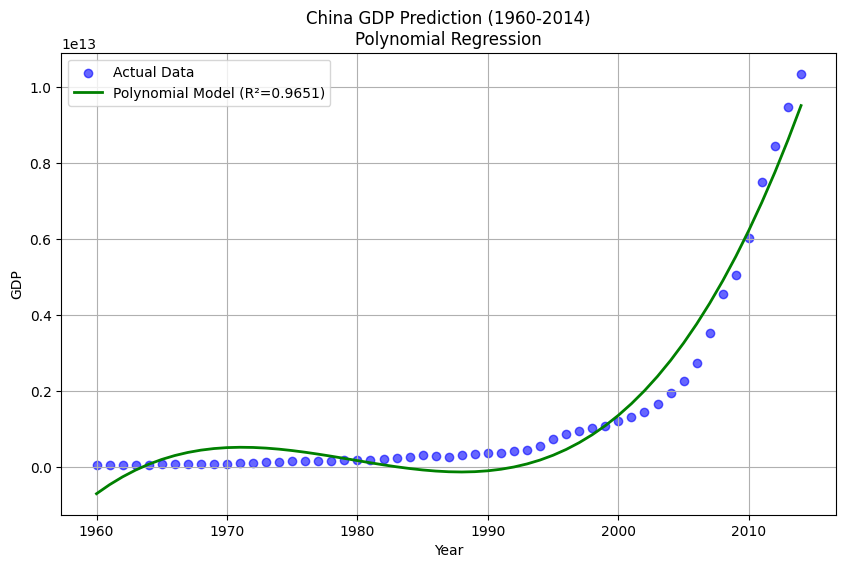

In [11]:
# plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Actual Data", color="blue", alpha=0.6)
plt.plot(X, y_pred_poly, label=f"Polynomial Model (R²={r2_poly:.4f})", color="green", linewidth=2)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("China GDP Prediction (1960-2014)\nPolynomial Regression")
plt.legend()
plt.grid()
plt.show()